<a href="https://colab.research.google.com/github/wiemila/GCE-ML-electrode-area/blob/main/GCE_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Zeszyt1.csv to Zeszyt1.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Zeszyt1.csv']),delimiter=';')

In [4]:
data

,Type of electrode,Type code,Ep_Ox [V],Ep_Red [V],deltaE [V],Ip_Ox [uA],Ip_Red [uA],Q_Ox [uC],Q_Red [uC],slope_Ox [uC/s^0.5],slope_Red [uC/s^0.5]
0,GCE_CB,2,0.250,0.190,0.060,8.023,-8.293,28.600,27.100,17.1720,-13.0800
1,GCE_CB,2,0.250,0.190,0.060,8.595,-9.159,28.900,29.400,18.1310,-13.2830
2,GCE_CB,2,0.250,0.190,0.060,8.771,-8.877,29.200,30.500,16.0990,-12.6080
3,GCE_CB,2,0.250,0.190,0.060,8.873,-8.817,31.200,31.700,17.3850,-13.9810
4,GCE_GO,3,0.200,0.110,0.090,0.399,-0.358,0.978,0.852,0.6260,-0.5664
5,GCE_GO,3,0.200,0.110,0.090,0.263,-0.250,0.817,0.687,0.5314,-0.4526
6,GCE_GO,3,0.200,0.100,0.100,0.169,-0.239,0.725,0.570,0.4705,-0.3734
7,GCE_GO,3,0.210,0.110,0.100,0.342,-0.463,0.958,0.798,0.6154,-0.5276
8,GCE_GO,3,0.190,0.100,0.090,0.237,-0.256,0.684,0.674,0.4113,-0.3794
9,GCE_GO,3,0.220,0.130,0.090,0.451,-0.703,1.250,1.070,0.7309,-0.6708


In [5]:
X = data.iloc[:,2:].values
X

array([[  0.25  ,   0.19  ,   0.06  ,   8.023 ,  -8.293 ,  28.6   ,
         27.1   ,  17.172 , -13.08  ],
       [  0.25  ,   0.19  ,   0.06  ,   8.595 ,  -9.159 ,  28.9   ,
         29.4   ,  18.131 , -13.283 ],
       [  0.25  ,   0.19  ,   0.06  ,   8.771 ,  -8.877 ,  29.2   ,
         30.5   ,  16.099 , -12.608 ],
       [  0.25  ,   0.19  ,   0.06  ,   8.873 ,  -8.817 ,  31.2   ,
         31.7   ,  17.385 , -13.981 ],
       [  0.2   ,   0.11  ,   0.09  ,   0.399 ,  -0.358 ,   0.978 ,
          0.852 ,   0.626 ,  -0.5664],
       [  0.2   ,   0.11  ,   0.09  ,   0.263 ,  -0.25  ,   0.817 ,
          0.687 ,   0.5314,  -0.4526],
       [  0.2   ,   0.1   ,   0.1   ,   0.169 ,  -0.239 ,   0.725 ,
          0.57  ,   0.4705,  -0.3734],
       [  0.21  ,   0.11  ,   0.1   ,   0.342 ,  -0.463 ,   0.958 ,
          0.798 ,   0.6154,  -0.5276],
       [  0.19  ,   0.1   ,   0.09  ,   0.237 ,  -0.256 ,   0.684 ,
          0.674 ,   0.4113,  -0.3794],
       [  0.22  ,   0.13  ,   0.09  ,

In [6]:
from sklearn.preprocessing import StandardScaler, normalize;

# Scaling the data so that all the features become comparable
sc = StandardScaler();
data_sc = sc.fit_transform(X);

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
data_sc_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
df_sc_normalized = pd.DataFrame(X)
df_sc = pd.DataFrame(X)

In [7]:
df_sc

,0,1,2,3,4,5,6,7,8
0,0.250,0.190,0.060,8.023,-8.293,28.600,27.100,17.1720,-13.0800
1,0.250,0.190,0.060,8.595,-9.159,28.900,29.400,18.1310,-13.2830
2,0.250,0.190,0.060,8.771,-8.877,29.200,30.500,16.0990,-12.6080
3,0.250,0.190,0.060,8.873,-8.817,31.200,31.700,17.3850,-13.9810
4,0.200,0.110,0.090,0.399,-0.358,0.978,0.852,0.6260,-0.5664
5,0.200,0.110,0.090,0.263,-0.250,0.817,0.687,0.5314,-0.4526
6,0.200,0.100,0.100,0.169,-0.239,0.725,0.570,0.4705,-0.3734
7,0.210,0.110,0.100,0.342,-0.463,0.958,0.798,0.6154,-0.5276
8,0.190,0.100,0.090,0.237,-0.256,0.684,0.674,0.4113,-0.3794
9,0.220,0.130,0.090,0.451,-0.703,1.250,1.070,0.7309,-0.6708


In [8]:
pca = PCA(n_components=6)
pca.fit(df_sc)

PCA(n_components=6)

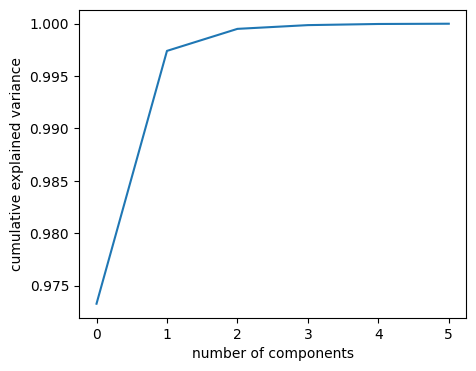

In [9]:
plt.figure(figsize=(5, 4))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
pca.explained_variance_ratio_

array([9.73261257e-01, 2.41437710e-02, 2.10319932e-03, 3.57622077e-04,
       1.08680319e-04, 2.47925154e-05])

<ipython-input-26-f89631a467cb>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


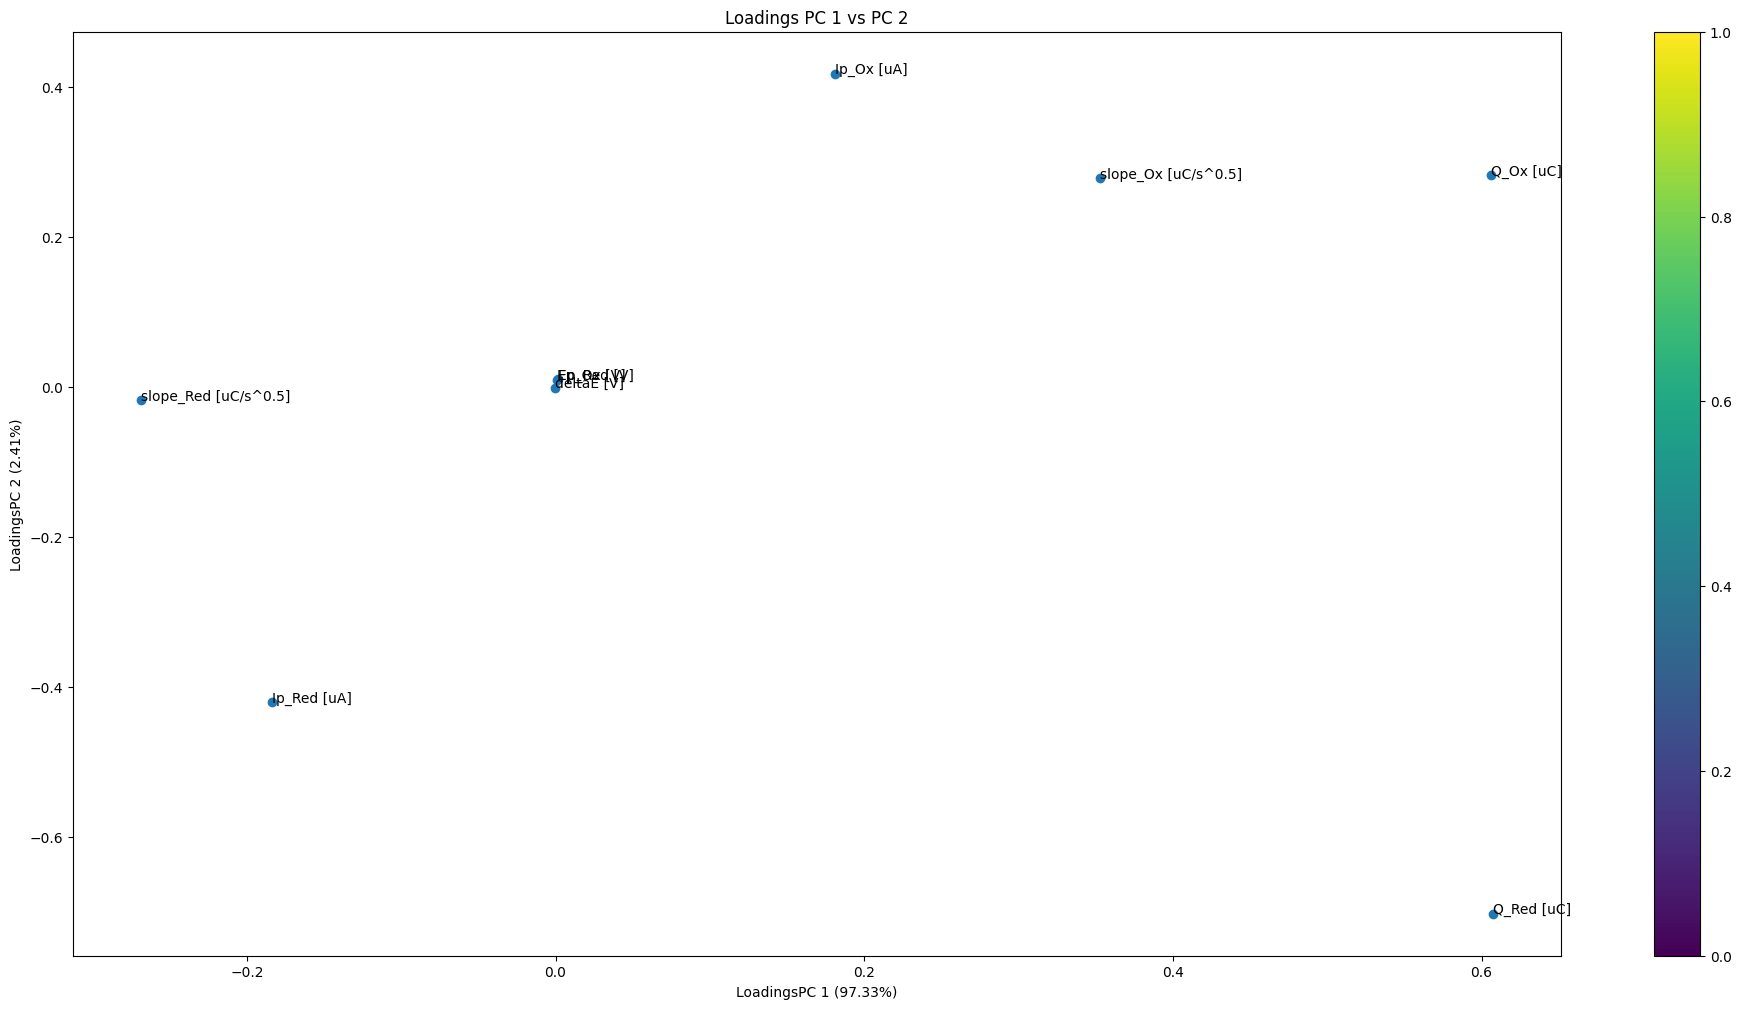

In [26]:
name = data.columns[2:]
plt.figure(figsize=(24,12))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

In [14]:
pca.components_

array([[ 9.85953096e-04,  1.65272918e-03, -6.66776087e-04,
         1.81278694e-01, -1.83876103e-01,  6.06273846e-01,
         6.07550351e-01,  3.52607558e-01, -2.68897697e-01],
       [ 9.78525282e-03,  1.08016387e-02, -1.01638588e-03,
         4.17217281e-01, -4.19504795e-01,  2.81644556e-01,
        -7.01907319e-01,  2.78241107e-01, -1.77863322e-02],
       [ 1.82923312e-02,  1.37877455e-02,  4.50458578e-03,
        -5.42461375e-01,  4.86725296e-01,  2.50982633e-01,
        -3.35958692e-01,  4.22986718e-01, -3.36913717e-01],
       [-8.35999996e-03, -4.32620912e-03, -4.03379084e-03,
        -1.80830611e-01, -3.54338727e-01, -5.72612269e-01,
         1.48561902e-01,  6.96777009e-01,  7.86500493e-02],
       [-4.07452354e-02, -4.52254226e-02,  4.48018715e-03,
         5.23730940e-01,  2.90852618e-01, -3.99129348e-01,
         6.13472718e-03,  3.17358730e-02, -6.90677953e-01],
       [ 5.24004764e-02,  5.69624341e-02, -4.56195771e-03,
        -4.32337424e-01, -5.83091186e-01, -3.896520

In [15]:
Loadings = pd.DataFrame(pca.components_)
Loadings

,0,1,2,3,4,5,6,7,8
0,0.000986,0.001653,-0.000667,0.181279,-0.183876,0.606274,0.607550,0.352608,-0.268898
1,0.009785,0.010802,-0.001016,0.417217,-0.419505,0.281645,-0.701907,0.278241,-0.017786
2,0.018292,0.013788,0.004505,-0.542461,0.486725,0.250983,-0.335959,0.422987,-0.336914
3,-0.008360,-0.004326,-0.004034,-0.180831,-0.354339,-0.572612,0.148562,0.696777,0.078650
4,-0.040745,-0.045225,0.004480,0.523731,0.290853,-0.399129,0.006135,0.031736,-0.690678
5,0.052400,0.056962,-0.004562,-0.432337,-0.583091,-0.038965,-0.052150,-0.363781,-0.574894


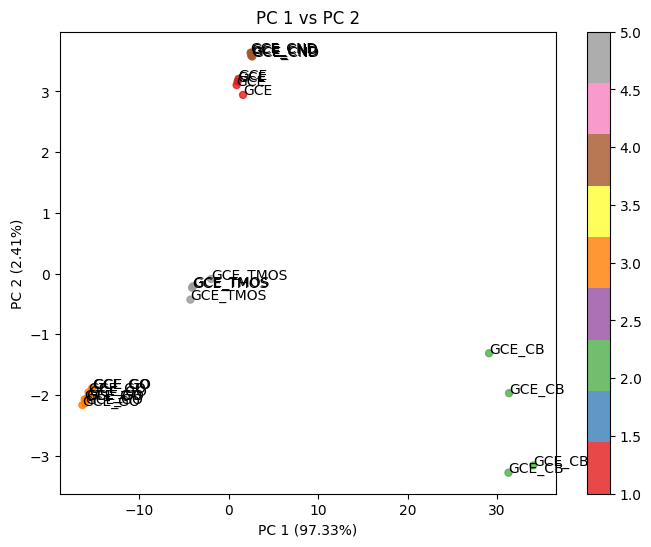

In [23]:
x_pca = pca.transform(df_sc)
name2 = data['Type of electrode']
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='Set1', s = 100,  c=data['Type code'], alpha = 0.8, marker = '.')

plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name2):
    plt.annotate(txt, (x_pca[i,0],x_pca[i,1]))
plt.colorbar();

In [19]:
Scores = pd.DataFrame(x_pca)
Scores

,0,1,2,3,4,5
0,29.116355,-1.311751,0.994323,0.068352,0.111204,0.027775
1,31.351268,-1.969261,0.039158,1.093926,0.223913,-0.078363
2,31.283503,-3.279128,-1.300244,-0.408952,-0.245576,-0.036790
3,34.055219,-3.158503,-0.221013,-0.627538,0.023512,0.065122
4,-15.617573,-2.005041,-0.338809,0.008536,0.127741,-0.039960
5,-15.923898,-2.064965,-0.275799,0.005573,0.069572,-0.060267
6,-16.112616,-2.071058,-0.255773,0.017770,0.003406,-0.040347
7,-15.667700,-1.956056,-0.363201,0.055020,0.047503,0.031532
8,-16.078099,-2.136554,-0.369412,0.008828,0.053705,-0.039153
9,-15.182242,-1.883569,-0.459723,0.062642,0.021122,0.140803


In [20]:
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=30, verbose=1, random_state=123)
projections = tsne.fit_transform(df_sc)

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.001s...
[t-SNE] Computed neighbors for 24 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 7.573608
[t-SNE] KL divergence after 250 iterations with early exaggeration: 166.603973
[t-SNE] KL divergence after 1000 iterations: 0.159446


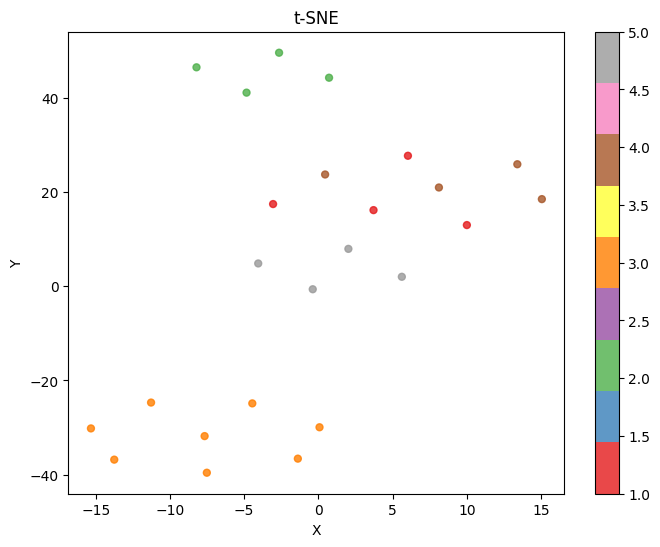

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(projections[:,0],projections[:,1],cmap='Set1', s = 100,  c=data['Type code'], alpha = 0.8, marker = '.')

plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();